> 中央大学理工学部ビジネスデータサイエンス学科<br>
> 23D7104001I 髙木悠人

## `cycle.csv`の分析


### `cycle.csv`の情報
```
instant: レコードの番号
dteday : 日付
season : 季節(1:春, 2:夏, 3:秋, 4:冬)
yr : 年(0: 2011, 1:2012)
mnth : 月(1～12の離散値)
hr : 時間 (0～23の離散値)
holiday : 祝日かどうか (http://dchr.dc.gov/page/holiday-schedule)
weekday : 曜日(0:日, 1:月, 2:火, 3:水, 4:木, 5:金, 6:土)
workingday : 週末もしくは休日でなければ1、そうでなければ0
weathersit : 天気(1:晴れ, 2:曇り, 3:雨, 4:豪雨・雪
temp : 平均気温
atemp : 平均体感気温
hum : 平均湿度
windspeed : 平均風量
casual : 非登録ユーザーの利用数
registered : 登録ユーザーの利用数
cnt : 登録ユーザーの利用数と非登録ユーザーの利用数の合計
```

### ディレクトリ構成
```
.
├── cycle.csv
└── notebooks
    └── report_python_髙木悠人.ipynb
```

### Python 実行環境
python: 3.12.11、venv環境にて実施

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Noto Sans CJK JP', 'Yu Gothic', 'sans-serif']

### (1) cycle.csv を読み込み、df_cycle という変数に格納してください。<br>また、df_cycle の最初の5行を表示してください。


In [2]:
df_cycle = pd.read_csv('../cycle.csv')
df_cycle.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011/1/1,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011/1/1,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011/1/1,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011/1/1,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### (2) df_cycle の行数と列数を確認してください。

In [3]:
print(f"行数: {df_cycle.shape[0]}")
print(f"列数: {df_cycle.shape[1]}")

行数: 17379
列数: 17


### (3) df_cycle の基本統計量を算出してください。

In [4]:
df_cycle.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17279.0,11.547659,6.912407,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### (4) df_cycle の欠損値の有無を確認し、欠損値がある場合には補完・削除などの処理をしてください。

In [5]:
# 欠損値の有無を確認
df_cycle.isnull().sum()

#欠損値を含む行を表示
df_cycle[df_cycle.isnull().any(axis=1)]


# `hr`列の欠損値の補完(平均値で補完)
# df_cycle['hr'] = df_cycle['hr'].fillna(df_cycle['hr'].mean())

# 本分析では、(5)で時間別の棒グラフを作成するため、欠損値を削除することにする。
df_cycle = df_cycle.dropna(subset=['hr'])

### (5) 時間別の「登録ユーザーの利用数と非登録ユーザーの利用数の合計」を集計し、棒グラフで表示してください。<br>また、グラフから読み取れることを記載してください。

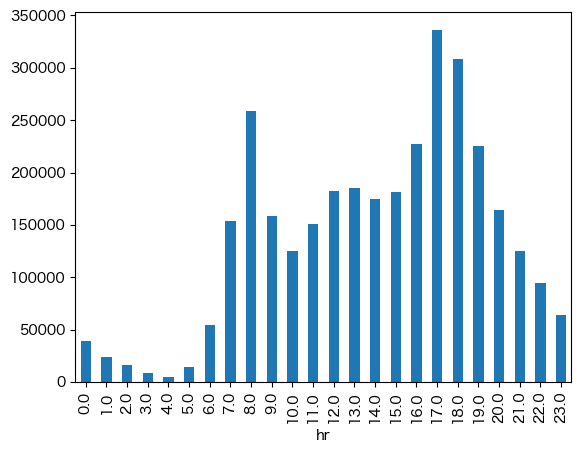

In [6]:
df_cycle_hr = df_cycle.groupby('hr')['cnt'].sum()

df_cycle_hr.plot(kind='bar')
plt.show()

### 考察
上記の図を見ると、朝(8時)と夕方(17時)に利用者数が増加し、夜間は急激に減少していることがわかる。<br>
朝と夜は通勤通学時間に該当することから、比較的平坦な都市部であると考える。

### (6) (5)以外の集計・可視化を行い、考察してください。

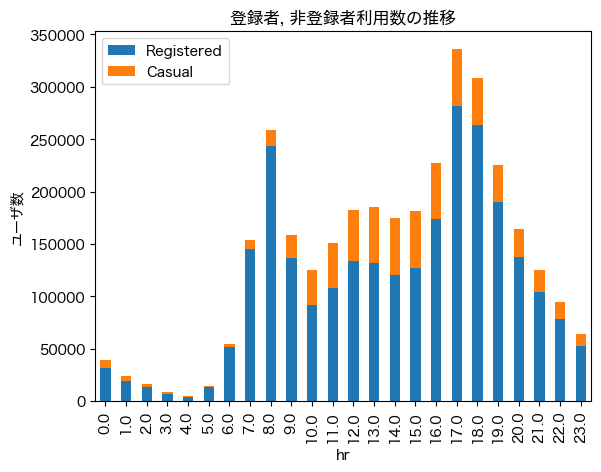

In [7]:
df_cycle_hr_detail = df_cycle.groupby('hr')[['registered', 'casual']].sum()
# 棒グラフで可視化
df_cycle_hr_detail.plot(kind='bar', stacked=True)
plt.ylabel('ユーザ数')
plt.title('登録者, 非登録者利用数の推移')
plt.legend(['Registered', 'Casual'])
plt.show()


#### 考察
上記の図から全体的に登録者の割合が高いことから、登録ユーザーはレンタルサイクルを日常的な移動手段として定期的に活用していることがわかる。一方、非登録ユーザー（casual）は10時から16時の間に多いことから、観光やレジャーなど日常利用以外の用途で利用していると考えられる。また、登録ユーザーの利用は朝方や夕方にピークが見られることから、通勤・通学に多く使われており、非登録ユーザーは昼間に利用が集中しているため休日や余暇の活動での利用が多いと推察できる。これにより、レンタルサイクルの利用目的はユーザー属性によって明確に異なっていると考察する。